## 1. Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## 2. Load Dataset 

In [2]:
df = pd.read_csv("../data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3.  Data Exploration (EDA)

In [3]:
df.shape        # number of rows & columns
df.info()       # column datatypes + null values
df.describe()   # summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
# Missing value analysis (even though you have none)
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Number of outliers: 0


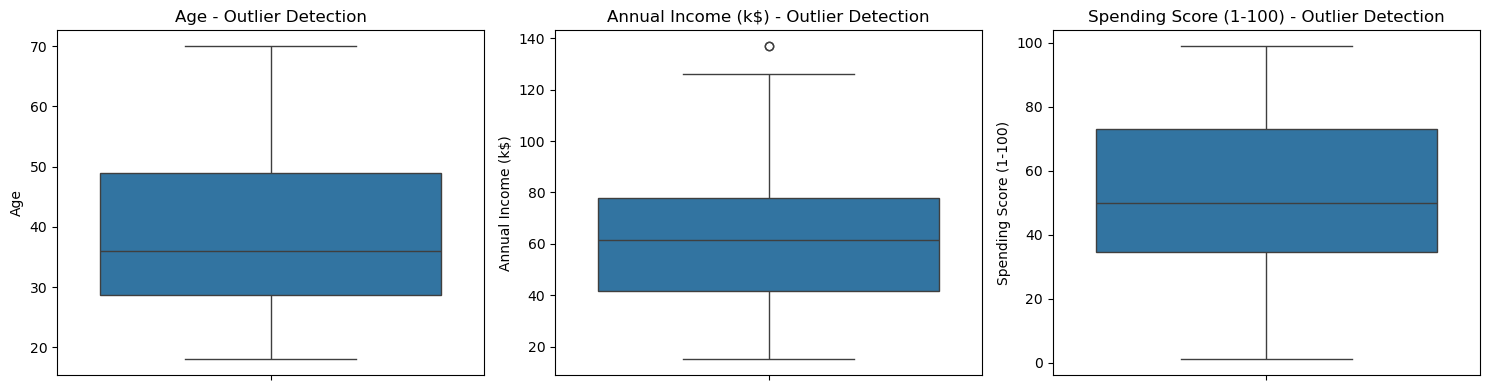

In [24]:
# Statistical outlier detection
from scipy import stats
z_scores = np.abs(stats.zscore(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers: {outliers.sum()}")

# Box plots for outlier visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'{col} - Outlier Detection')
plt.tight_layout()
plt.show()

/var/folders/1y/pn9x7lqd0vj4j9d589w2jl1r0000gn/T/ipykernel_28986/1172674212.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df,palette="pastel")


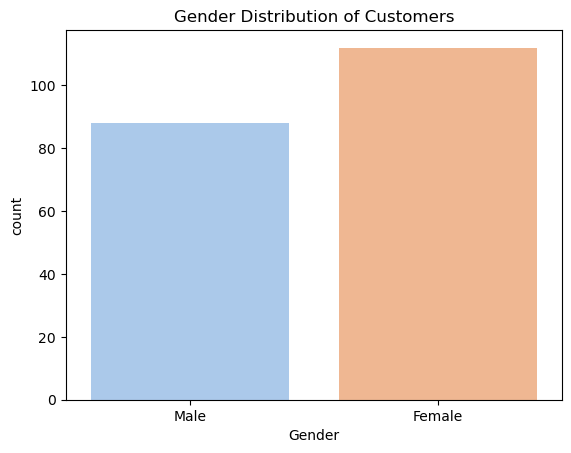

Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64

In [5]:
sns.countplot(x="Gender", data=df,palette="pastel")
plt.title("Gender Distribution of Customers")
plt.show()
df["Gender"].value_counts(normalize=True) * 100

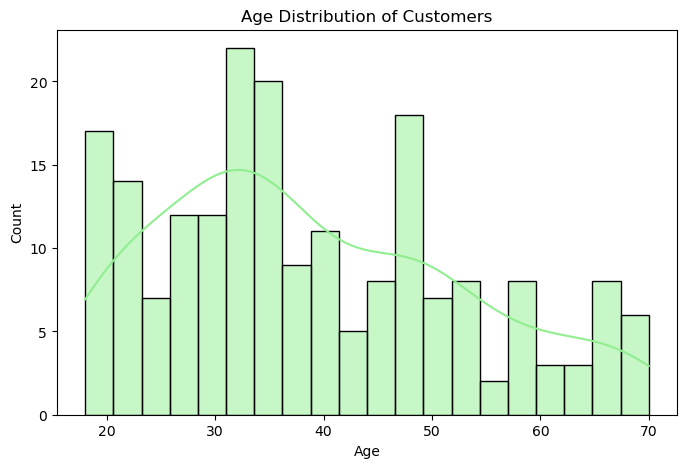

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True, color="lightgreen")
plt.title("Age Distribution of Customers")
plt.show()

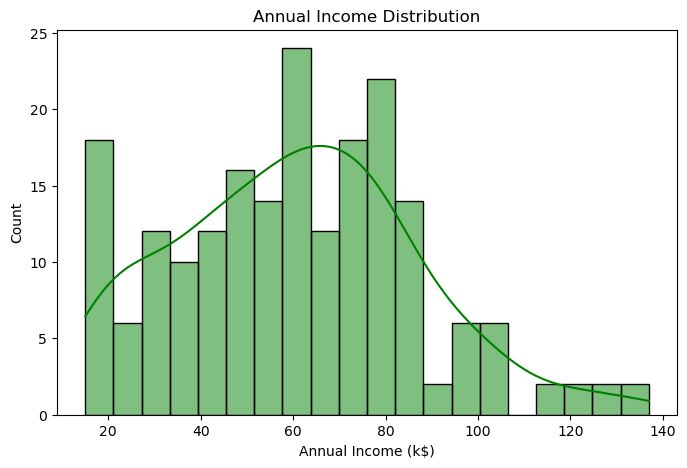

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True, color="green")
plt.title("Annual Income Distribution")
plt.show()

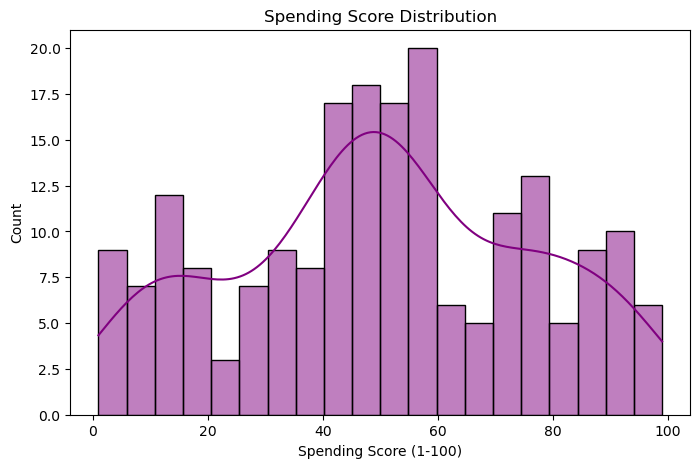

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True, color="purple")
plt.title("Spending Score Distribution")
plt.show()

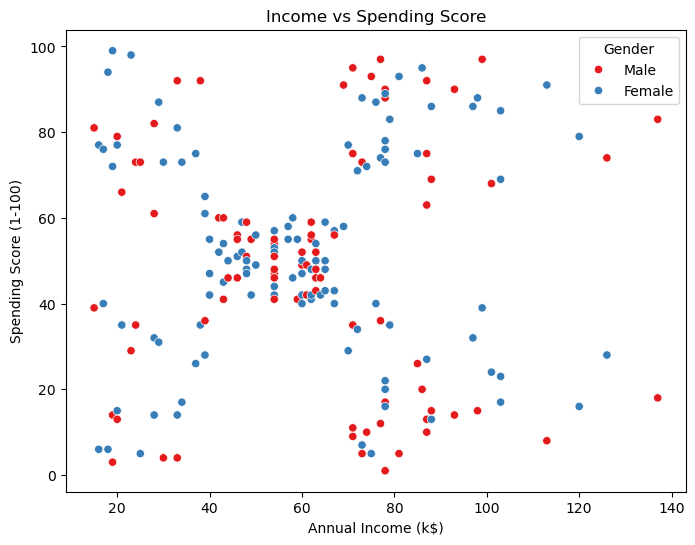

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Gender",
    data=df,
    palette="Set1",
)
plt.title("Income vs Spending Score")
plt.show()

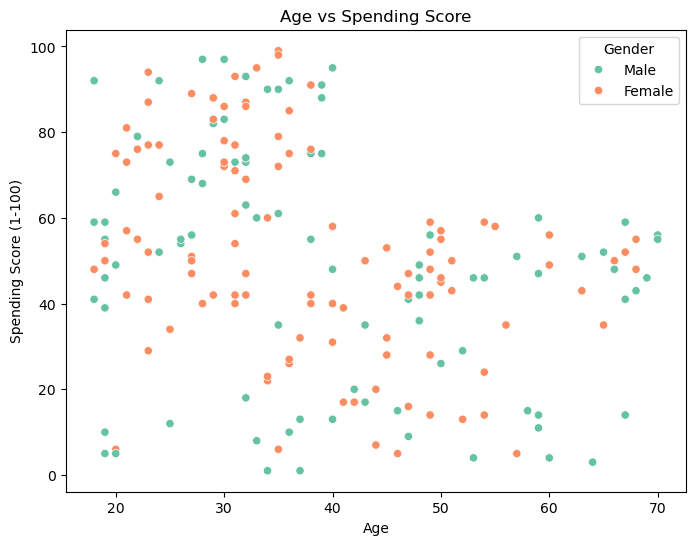

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Age", 
    y="Spending Score (1-100)", 
    data=df, 
    hue="Gender", 
    palette="Set2"
)
plt.title("Age vs Spending Score")
plt.show()

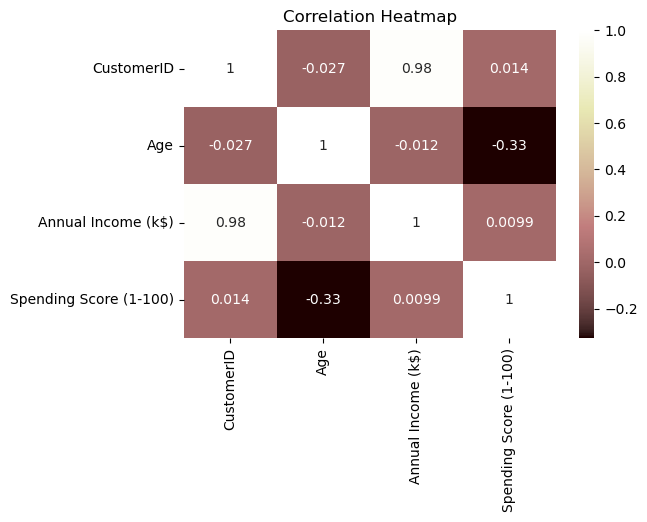

In [11]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="pink")
plt.title("Correlation Heatmap")
plt.show()

## 4. Data Preprocessing

In [12]:
df = df.drop('CustomerID',axis=1)

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

In [14]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 🔍 Types of Clustering Algorithms

Clustering algorithms can be broadly categorized into different families based on how they form clusters:


#### 1. **Partition-based (Centroid-based)**
- Example: **KMeans**
- Works by assigning each data point to the nearest centroid and updating centroids iteratively.
- Best for: spherical and well-separated clusters.
- Limitation: requires specifying number of clusters *k*.


#### 2. **Density-based**
- Example: **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
- Groups together points that are closely packed (high density) and marks sparse points as noise.
- Best for: clusters of arbitrary shapes, detecting outliers.
- Limitation: struggles if clusters have varying densities.


#### 3. **Hierarchical (Tree-based)**
- Example: **Agglomerative Clustering**
- Builds a tree (dendrogram) by successively merging (bottom-up) or splitting (top-down) clusters.
- Best for: datasets where hierarchy/relationships are important.
- Limitation: computationally expensive for very large datasets.


#### 4. **Model-based (Probabilistic)**
- Example: **Gaussian Mixture Models (GMM)**
- Assumes data is generated from a mixture of probability distributions (typically Gaussian).
- Allows **soft clustering** → a point can belong to multiple clusters with probabilities.
- Best for: overlapping clusters with elliptical shapes.
- Limitation: assumes underlying distribution (often Gaussian).


### ✅ Summary
- **KMeans** → fast, simple, best for convex clusters.  
- **DBSCAN** → handles noise, arbitrary shapes, but sensitive to parameters.  
- **Hierarchical** → reveals cluster hierarchy but can be slow.  
- **GMM** → flexible with soft assignments, good for overlapping clusters.  

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np

# Dictionary to store results
results = {}

# ---------- KMeans ----------
for k in range(2, 11):  # trying multiple k
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    results[f"KMeans (k={k})"] = score

# ---------- DBSCAN ----------
for eps in [0.3, 0.5, 0.7, 1.0]:  # trying different eps values
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)
    if len(set(labels)) > 1 and -1 not in set(labels):  # ignore noise-only clustering
        score = silhouette_score(X_scaled, labels)
        results[f"DBSCAN (eps={eps})"] = score

# ---------- Hierarchical ----------
for k in range(2, 11):
    hierarchical = AgglomerativeClustering(n_clusters=k)
    labels = hierarchical.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    results[f"Hierarchical (k={k})"] = score

# ---------- Gaussian Mixture ----------
for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    results[f"GMM (k={k})"] = score

# ---------- Compare ----------
print("Silhouette Scores:")
best_algo = max(results, key=results.get)
for algo, score in results.items():
    print(f"{algo}: {score:.3f}")

print(f"\n Best Clustering Method: {best_algo} with score {results[best_algo]:.3f}")

Silhouette Scores:
KMeans (k=2): 0.335
KMeans (k=3): 0.358
KMeans (k=4): 0.404
KMeans (k=5): 0.417
KMeans (k=6): 0.428
KMeans (k=7): 0.417
KMeans (k=8): 0.408
KMeans (k=9): 0.418
KMeans (k=10): 0.407
Hierarchical (k=2): 0.318
Hierarchical (k=3): 0.321
Hierarchical (k=4): 0.361
Hierarchical (k=5): 0.390
Hierarchical (k=6): 0.420
Hierarchical (k=7): 0.398
Hierarchical (k=8): 0.366
Hierarchical (k=9): 0.375
Hierarchical (k=10): 0.381
GMM (k=2): 0.329
GMM (k=3): 0.335
GMM (k=4): 0.373
GMM (k=5): 0.376
GMM (k=6): 0.400
GMM (k=7): 0.394
GMM (k=8): 0.343
GMM (k=9): 0.340
GMM (k=10): 0.305

🏆 Best Clustering Method: KMeans (k=6) with score 0.428


### Choosing Optimal K 

#### 1.  Elbow Method



The **Elbow Method** helps to choose the optimal number of clusters (**k**) in KMeans by looking at the **Within-Cluster Sum of Squares (WCSS)**.

**Formula:**

$$
\mathrm{WCSS}=\sum_{i=1}^{k}\sum_{x\in C_i}\lVert x-\mu_i\rVert^2
$$
where:  
- $C_i$ = set of points in cluster $i$  
- $\mu_i$ = centroid of cluster $i$  
- $\lVert x - \mu_i \rVert^2$ = squared Euclidean distance between a point $x$ and its cluster centroid

**Steps:**
1. Run KMeans for different values of \(k\) (e.g., 1 to 10).  
2. Calculate the WCSS for each \(k\).  
3. Plot **k vs WCSS**.  
4. The point where the WCSS starts to decrease slowly (the "elbow") is the optimal number of clusters.  



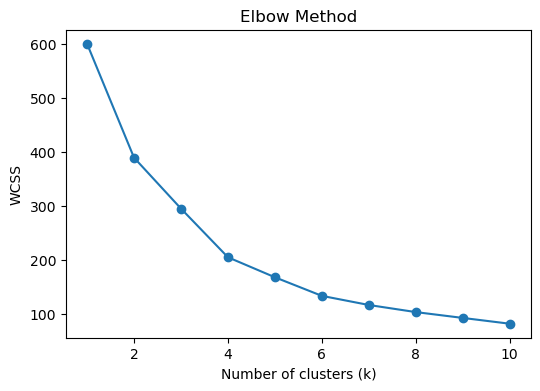

In [16]:
# Elbow Method (WCSS)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

Above plot :
->Before 4, WCSS decreases rapidly (meaning adding clusters improves grouping a lot).
->After 4, WCSS decreases slowly → diminishing returns.

Optimal number of Cluster = 4


### 2. Silhouette Score


The **Silhouette Method** helps evaluate how well-separated the clusters are.  
It measures both **cohesion** (how close points are to their own cluster) and **separation** (how far points are from other clusters).

**Formula:**

For each data point \(x\):

$$
s(x) = \frac{b(x) - a(x)}{\max(a(x), b(x))}
$$

where:  
- $a(x)$ = average distance of $x$ to all other points in the **same cluster** (cohesion)  
- $b(x)$ = minimum average distance of $x$ to points in the **nearest other cluster** (separation)  

**Interpretation:**  
- $s(x) \approx +1$ → point is well-matched to its cluster and far from others  
- $s(x) \approx 0$ → point lies between two clusters  
- $s(x) \approx -1$ → point may be assigned to the wrong cluster  

👉 The **average silhouette score** across all points is calculated for each $k$.  
The optimal number of clusters is the one with the **highest average silhouette score**.

In [17]:
# Silhouette Score
print("\nSilhouette Scores for different k values:")
for k in range(2, 11):   # silhouette needs at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k = {k}, Silhouette Score = {score:.3f}")


Silhouette Scores for different k values:
k = 2, Silhouette Score = 0.335
k = 3, Silhouette Score = 0.358
k = 4, Silhouette Score = 0.404
k = 5, Silhouette Score = 0.417
k = 6, Silhouette Score = 0.428
k = 7, Silhouette Score = 0.417
k = 8, Silhouette Score = 0.408
k = 9, Silhouette Score = 0.418
k = 10, Silhouette Score = 0.407


**Interpretation:**  
- The Silhouette Score peaks at **$k = 6$ (0.428)**.  
- This indicates that **6 clusters** provide the best balance between cohesion (points close to their cluster) and separation (clusters well apart).  
- Practically, **$k = 5$ or $k = 6$** both work well, since their scores are very close.

 #### Fit KMeans Models for k=4 and k=6

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
# KMeans with k=4
kmeans4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels4 = kmeans4.fit_predict(X_scaled)

# KMeans with k=6
kmeans6 = KMeans(n_clusters=6, random_state=42, n_init=10)
labels6 = kmeans6.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df["Cluster_k4"] = labels4
df["Cluster_k6"] = labels6

#### Compare Silhouette Scores

In [19]:
score4 = silhouette_score(X_scaled, labels4)
score6 = silhouette_score(X_scaled, labels6)


print(f"Silhouette Score (k=4): {score4:.3f}")
print(f"Silhouette Score (k=6): {score6:.3f}")

Silhouette Score (k=4): 0.404
Silhouette Score (k=6): 0.428


In [20]:
import pandas as pd

# For k=4
centers4 = pd.DataFrame(kmeans4.cluster_centers_, columns=X.columns)
print("\nCluster Centers (k=4):\n", centers4)

# For k=6
centers6 = pd.DataFrame(kmeans6.cluster_centers_, columns=X.columns)
print("\nCluster Centers (k=6):\n", centers6)


Cluster Centers (k=4):
         Age  Annual Income (k$)  Spending Score (1-100)
0  1.086161           -0.490565               -0.397174
1 -0.428806            0.974847                1.216085
2 -0.962492           -0.784763                0.392030
3  0.037205            0.990115               -1.188757

Cluster Centers (k=6):
         Age  Annual Income (k$)  Spending Score (1-100)
0  1.254721           -0.240213               -0.043998
1 -0.865157           -0.131968               -0.080430
2  0.221716            1.083225               -1.290052
3 -0.441917            0.991583                1.239503
4 -0.993969           -1.347348                1.064048
5  0.478957           -1.308230               -1.196444


###  Features scaling
- The cluster centers are **z-scores** (standardized values).  
  - Mean = 0  
  - Standard Deviation = 1  
- How to read them:  
  - Positive value → above average  
  - Negative value → below average  

Example:  
- A centroid with `Age = 1.08` does **not** mean the average age is 1.08 years.  
- It means this cluster’s customers are **older than the dataset’s average age**.  

---

###  k = 4 Clusters (Elbow Method)
| Cluster | Age | Income | Spending | Interpretation |
|---------|-----|--------|----------|----------------|
| **0** | +1.08 (older) | -0.49 (low income) | -0.39 (low spending) | **Budget Seniors** → Older, low-income, low-spending customers |
| **1** | -0.43 (younger) | +0.97 (high income) | +1.21 (high spending) | **Premium Young Spenders** → Young, rich, high spenders |
| **2** | -0.96 (younger) | -0.78 (low income) | +0.39 (moderate spending) | **Impulsive Shoppers** → Young, low income, still spend |
| **3** | ~0.03 (average age) | +0.99 (high income) | -1.18 (very low spending) | **Cautious Rich** → High income but very cautious spending |

---

---

###  k = 6 Clusters (Silhouette Method)
| Cluster | Age | Income | Spending | Interpretation |
|---------|-----|--------|----------|----------------|
| **0** | +1.25 (older) | -0.24 (slightly low) | -0.04 (average spending) | **Average Older Customers** |
| **1** | -0.86 (younger) | -0.13 (around average income) | -0.08 (average spending) | **Young Middle-Class** |
| **2** | +0.22 (slightly older) | +1.08 (high income) | -1.29 (very low spending) | **Cautious Rich** |
| **3** | -0.44 (younger) | +0.99 (high income) | +1.24 (very high spending) | **Premium Young Spenders** |
| **4** | -0.99 (younger) | -1.34 (low income) | +1.06 (high spending) | **Impulse Buyers** |
| **5** | +0.48 (older) | -1.30 (low income) | -1.19 (very low spending) | **Budget Seniors** |

---

### 🔹 Comparison of k=4 vs k=6

- **k = 4 (Broad Segmentation)**  
  Groups customers into larger, more general categories.  
  -> Easy to interpret.  
  -> Good for a quick overview of the market.  
  ->  But, may hide subtle differences between customers.  

- **k = 6 (Detailed Segmentation)**  
  Breaks customers into smaller, more specific groups.  
  ->  Helps uncover hidden patterns in customer behavior.  
  -> Great for **targeted campaigns** and personalization.  
  -> Slightly more complex to explain and act on.  

 **Conclusion**:  
- For a **high-level business strategy** (like deciding product ranges or broad marketing themes), go with **k = 4**.  
- For **fine-grained insights** (like personalized offers, loyalty programs, or premium targeting), **k = 6** is better.  

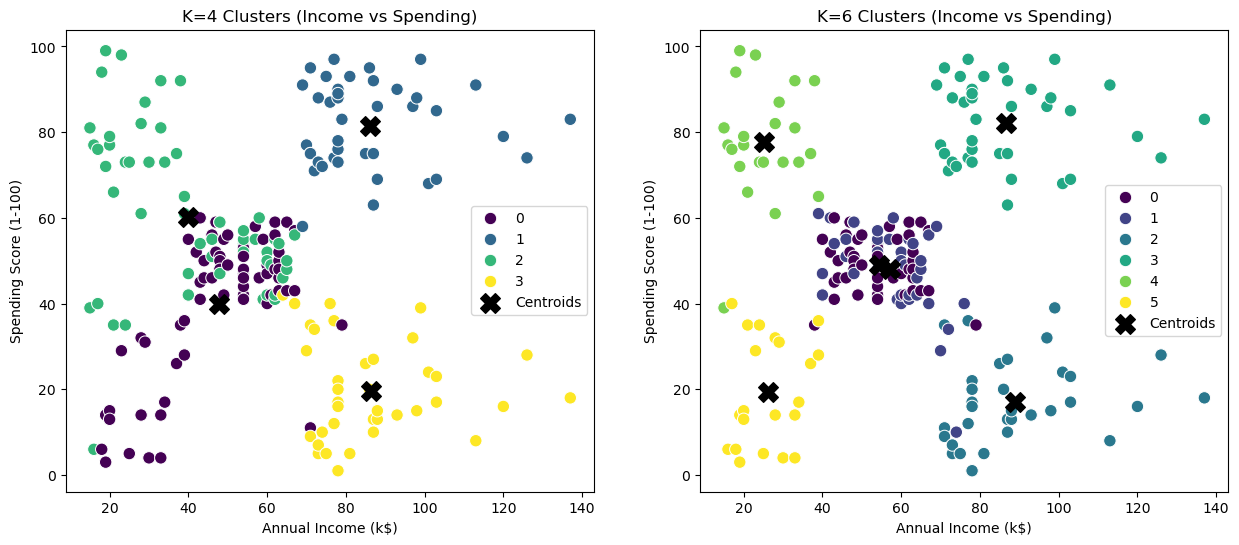

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get cluster centers back to original scale
centers4 = scaler.inverse_transform(kmeans4.cluster_centers_)
centers6 = scaler.inverse_transform(kmeans6.cluster_centers_)

fig, axes = plt.subplots(1, 2, figsize=(15,6))

# ---- Plot for k=4 ----
sns.scatterplot(
    x="Annual Income (k$)", y="Spending Score (1-100)",
    hue="Cluster_k4", palette="viridis", data=df, s=80, ax=axes[0]
)
axes[0].scatter(
    centers4[:, X.columns.get_loc("Annual Income (k$)")],
    centers4[:, X.columns.get_loc("Spending Score (1-100)")],
    c="black", s=200, marker="X", label="Centroids"
)
axes[0].set_title("K=4 Clusters (Income vs Spending)")
axes[0].legend()

# ---- Plot for k=6 ----
sns.scatterplot(
    x="Annual Income (k$)", y="Spending Score (1-100)",
    hue="Cluster_k6", palette="viridis", data=df, s=80, ax=axes[1]
)
axes[1].scatter(
    centers6[:, X.columns.get_loc("Annual Income (k$)")],
    centers6[:, X.columns.get_loc("Spending Score (1-100)")],
    c="black", s=200, marker="X", label="Centroids"
)
axes[1].set_title("K=6 Clusters (Income vs Spending)")
axes[1].legend()

plt.show()

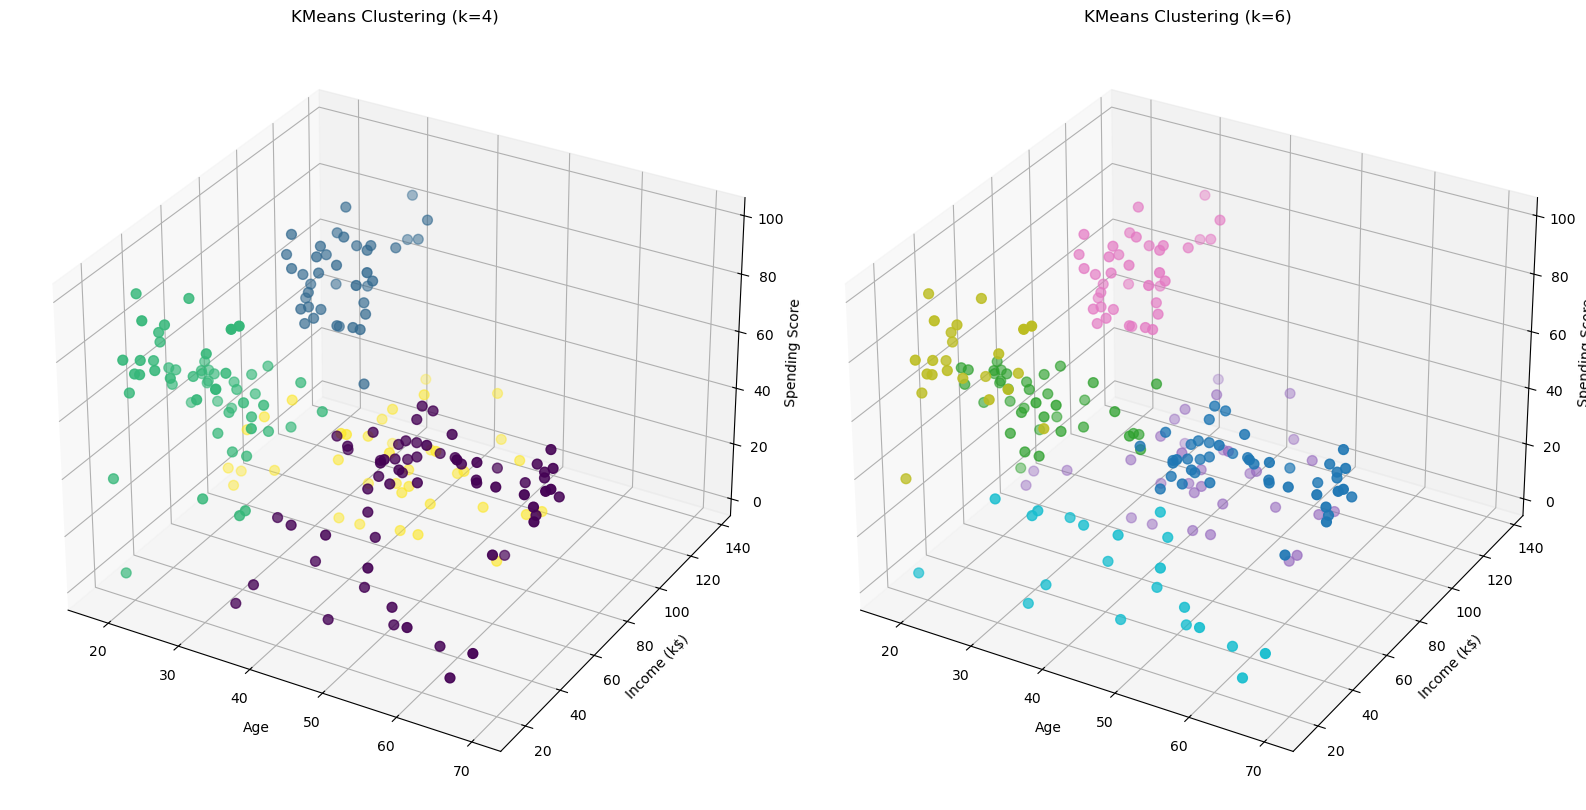

In [22]:
import matplotlib.pyplot as plt

# Create one big figure
fig = plt.figure(figsize=(16, 8))

# --- 3D Plot for k=4 ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"],
            c=df["Cluster_k4"], cmap="viridis", s=50)
ax1.set_title("KMeans Clustering (k=4)", fontsize=12)
ax1.set_xlabel("Age")
ax1.set_ylabel("Income (k$)")
ax1.set_zlabel("Spending Score")

# --- 3D Plot for k=6 ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"],
            c=df["Cluster_k6"], cmap="tab10", s=50)
ax2.set_title("KMeans Clustering (k=6)", fontsize=12)
ax2.set_xlabel("Age")
ax2.set_ylabel("Income (k$)")
ax2.set_zlabel("Spending Score")

# Adjust layout so plots don't overlap/collapse
plt.tight_layout()
plt.show()